## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance to answer the following questions:

1.  Is the distribution of body temperatures normal? 
2.  Is the true population mean really 98.6 degrees F?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
4.  Is there a significant difference between males and females in normal temperature?



#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm


In [8]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stts

from scipy.stats.mstats import normaltest 

In [9]:
%matplotlib inline

In [10]:
df = pd.read_csv('data/human_body_temperature.csv')

# Exercise

Answer the following questions in this notebook and submit to your Github account. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

In [11]:
n = len(df)
n

130

In [12]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


### 1) Testing for normality

In [13]:
k2,pval = normaltest(df['temperature'])
print(k2)
print(pval)

2.70380143332
0.258747986349


According to the D'Agostina and Pearson test, there is a 25% chance this data came from a normal distribution.

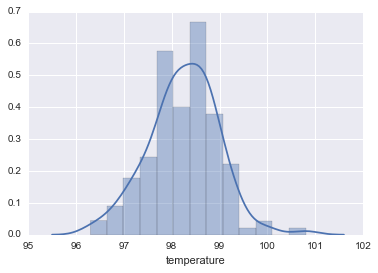

In [14]:
sns.distplot(df['temperature'])

Visual inspection of the histogram shows the data is pretty close to normal, although not quite.

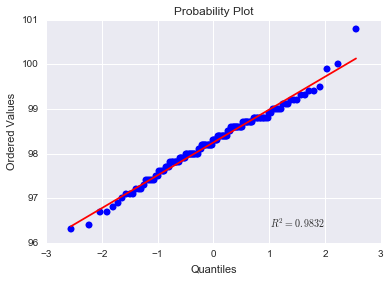

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
stts.probplot(df['temperature'],plot=ax)
plt.show()

Inspection of Q-Q plot again shows pretty close to normal. I'd say it's normal.

### 2) Is the true population mean really 98.6 F?
Okay, hypothesis time! We use a t-test which is better because it compensates for inaccuracies in estimating the standard error. At larger sample sizes the t-distribution is much the same as the normal distribution (and Z test). A z-test would show a smaller p-value (assuming the sample size wasn't that big).


In [16]:
temps= df['temperature']
point_estimate = np.mean(temps)
point_estimate

98.24923076923078

The mean of the sample is 98.25 F, which is lower!!

Now run single sample t-test.

In [17]:
from scipy import stats

In [18]:
t_stat, p_val = stats.ttest_1samp(df['temperature'],98.6)
print(t_stat)
print(p_val)

-5.45482329236
2.41063204156e-07


With than p-value, it's really true!

### 3) At what temperature temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [19]:
SE = np.std(temps)/np.sqrt(len(temps))

In [20]:
z = stats.norm.ppf(0.975)
Margin_of_Error = z*SE
Margin_of_Error

0.12554865777413815

In [21]:
z = stats.norm.ppf(0.975)
confidence_interval = [point_estimate - z*SE, point_estimate + z*SE]
confidence_interval

[98.123682111456645, 98.37477942700491]

If we take someone's temperature to be abnormal when it is outside the 95% CI, then when there temperature is outside the given range.

### 4) Is there a significant difference between males and females in normal temperature?
Set up and solve for a two sample hypothesis testing.

In [22]:
male_temps = df[df['gender']=='M']['temperature']
female_temps = df[df['gender']=='F']['temperature']

Null Hypothesis: mean of male temps == mean of female temps
Alternative: mean of male temps != mean of female temps

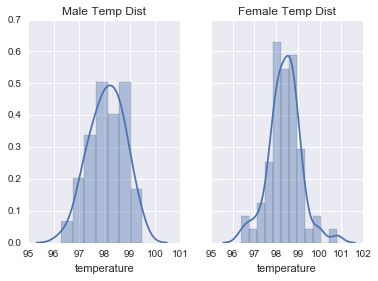

In [23]:
#Need to test some assumptions:
fig,(axis1,axis2)= plt.subplots(1,2,sharey=True)

sns.distplot(male_temps,ax=axis1)
sns.distplot(female_temps,ax=axis2)
axis1.set_title('Male Temp Dist')
axis2.set_title('Female Temp Dist')

In [24]:
# These appear close to normal . . . although standard deviation is a little different.

In [25]:
np.std(male_temps)

0.6933598841828696

In [26]:
np.std(female_temps)

0.7377464486428966

In [27]:
#Well, pretty close.

In [28]:
t_val,p_value = stts.ttest_ind(male_temps,female_temps)
print('t_val=',t_val)
print('p_val=',p_value)


t_val= -2.28543453817
p_val= 0.0239318831224


In [29]:
print(np.mean(male_temps))
print(np.mean(female_temps))
print('mean diff = ',np.mean(male_temps)-np.mean(female_temps))

98.1046153846154
98.39384615384613
mean diff =  -0.289230769230727


With p<0.05, the mean temperatures are different.